<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/resnet_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [4]:
train = path/'training'
train.ls()

[PosixPath('/root/.fastai/data/mnist_png/training/0'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/4'),
 PosixPath('/root/.fastai/data/mnist_png/training/7'),
 PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/3')]

In [5]:
il = ImageList.from_folder(path, convert_mode = 'L')

(array([PosixPath('/root/.fastai/data/mnist_png/training/0/52133.png'),
        PosixPath('/root/.fastai/data/mnist_png/training/0/8469.png'),
        PosixPath('/root/.fastai/data/mnist_png/training/0/57642.png'),
        PosixPath('/root/.fastai/data/mnist_png/training/0/7130.png')], dtype=object),
 None)

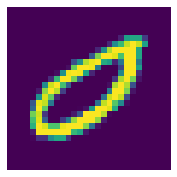

In [6]:
il.items[:4], il[0].show()

In [7]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png

In [8]:
defaults.cmap = 'binary'

In [9]:
split = il.split_by_folder(train = 'training', valid = 'testing')

In [10]:
split

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png;

Test: None

In [11]:
src = split.label_from_folder(); src

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_png;

Test: None

In [12]:
x, y = src.train[0]
x, y

(Image (1, 28, 28), Category 0)

In [13]:
rand_pad(padding=3, size=28, mode='zeros')

[RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 3, 'mode': 'zeros'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmPixel (crop), kwargs={'size': 28, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)]

In [14]:
tfms = [[*rand_pad(padding= 3, size = 28, mode = 'zeros')], []]
ntfms = [[*rand_pad(padding = 3, size = 28, mode = 'reflection')]]

In [15]:
bs = 128
data = src.transform(tfms).databunch(bs = bs).normalize()

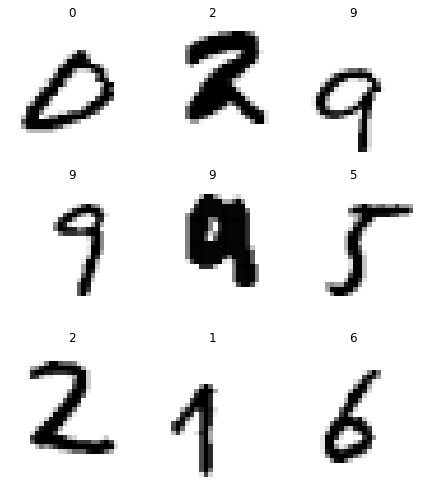

In [16]:
data.show_batch(3, figsize = (6, 7))

In [17]:
doc(plot_multi)

In [18]:
data.train_ds[0]

(Image (1, 28, 28), Category 0)

In [19]:
def simple_plot(i, j, ax):
  img, y = data.train_ds[0]
  img.show(ax, cmap='gray')

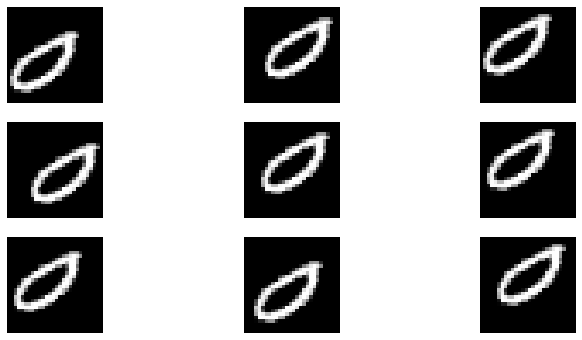

In [20]:
plot_multi(simple_plot, 3, 3 )

In [21]:
data

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /root/.fastai/data/mnist_png;

Test: None

In [22]:
mini_bat = data.one_batch()

In [23]:
xb, yb = mini_bat
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [24]:
x = nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1)

In [25]:
params = []
for i in x.parameters(): params.append(i)

In [26]:
params[0].shape

torch.Size([8, 1, 3, 3])

In [28]:
params[0]

Parameter containing:
tensor([[[[-0.0579, -0.1361,  0.2415],
          [ 0.1819, -0.0995, -0.0172],
          [-0.2779, -0.0791,  0.1129]]],


        [[[-0.2839, -0.1103,  0.2757],
          [-0.3301,  0.0507,  0.3150],
          [-0.0570,  0.1421,  0.0865]]],


        [[[-0.1905, -0.2515,  0.1103],
          [-0.1717,  0.2359,  0.0743],
          [-0.1692,  0.2551,  0.2208]]],


        [[[ 0.1659,  0.0159, -0.1919],
          [-0.0925, -0.2571,  0.2740],
          [ 0.0147,  0.2432, -0.1034]]],


        [[[-0.2709,  0.0439,  0.0186],
          [-0.0242, -0.0796,  0.2172],
          [-0.2143,  0.1567,  0.0342]]],


        [[[ 0.3285,  0.1325,  0.0601],
          [-0.2471, -0.2990,  0.0896],
          [-0.3297,  0.2553,  0.2287]]],


        [[[-0.0148,  0.2973, -0.2266],
          [ 0.2478, -0.1271,  0.1179],
          [-0.1618, -0.0398,  0.2069]]],


        [[[ 0.2804,  0.2367, -0.0311],
          [ 0.0216,  0.1114, -0.1945],
          [ 0.2944, -0.3006, -0.3242]]]], requires_gr

In [101]:
def conv(ni, nf):
  return nn.Conv2d(ni, nf, kernel_size = 3, stride = 2, padding = 1)

In [97]:
model = nn.Sequential(
    conv(1, 10), #14
    nn.BatchNorm2d(10),
    nn.ReLU(),
    conv(10, 16), #7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), #4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), #2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), #1
    nn.BatchNorm2d(10),
    nn.ReLU(),
    Flatten()
)

In [98]:
op = model(xb); op.shape

torch.Size([128, 10])

In [ ]:
model

Sequential(
  (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(10, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (13): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): Flatten()
)

In [99]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics = accuracy)

In [35]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [10, 14, 14]         100        True      
______________________________________________________________________
BatchNorm2d          [10, 14, 14]         20         True      
______________________________________________________________________
ReLU                 [10, 14, 14]         0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,456      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [37]:
op

tensor([[0.0000, 0.2336, 1.9587,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.9043],
        [1.3754, 0.0000, 0.5328,  ..., 0.5430, 1.2467, 0.1086],
        ...,
        [0.6514, 1.7204, 1.5385,  ..., 1.4273, 1.4842, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0717, 1.5254],
        [1.5522, 0.6327, 0.0000,  ..., 1.1763, 0.0000, 0.0000]],
       grad_fn=<ViewBackward>)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


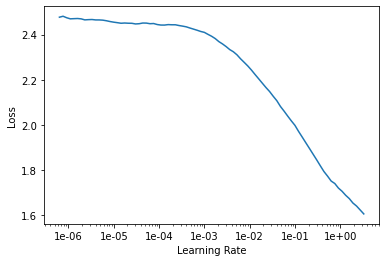

In [100]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(2, slice(2e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.191378,0.129154,0.961700,00:37
1,0.093721,0.051517,0.984300,00:36


In [39]:
def conv2(ni, nf): return conv_layer(ni, nf, stride=2)

In [40]:
n_model = nn.Sequential(conv2(1, 10), #14
                        conv2(10, 18), #7
                        conv2(18, 36), #4
                        conv2(36, 18), #2
                        conv2(18, 10), #1
                        Flatten())

In [41]:
learn = Learner(data, n_model, loss_func=nn.CrossEntropyLoss(), metrics = accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


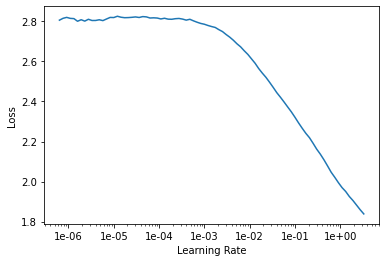

In [42]:
learn.lr_find()
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(5, slice(3e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.228484,0.262197,0.916200,00:36
1,0.146138,0.097424,0.971700,00:37
2,0.102727,0.064611,0.979500,00:36
3,0.061914,0.039929,0.986700,00:36
4,0.055584,0.030343,0.989900,00:36


In [44]:
res = res_block(10)

In [45]:
res

SequentialEx(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): MergeLayer()
  )
)

In [82]:
model = nn.Sequential(
    conv_layer(1, 16, stride = 2), #14
    # res_block(16),
    conv_layer(16, 32, stride = 2), #8
    # res_block(32), 
    conv_layer(32, 64, stride = 2), #4
    # res_block(64),
    conv_layer(64, 32, stride = 2), #2
    # res_block(32),
    conv_layer(32, 10, stride = 2), #1
    Flatten()
)

In [83]:
learn = Learner(data, model = model, loss_func= nn.CrossEntropyLoss, metrics = accuracy)

In [61]:
doc(conv_layer)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


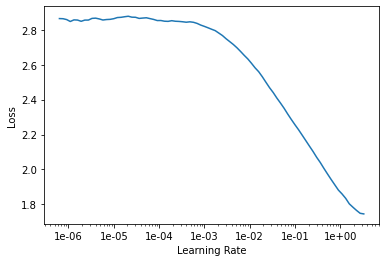

In [104]:
#refactored model
def conv_res(ni, nf, stride = 2):
  return nn.Sequential(conv_layer(ni, nf, stride = 2), res_block(nf))

model = nn.Sequential(
  conv_res(1, 10), #14
  conv_res(10, 24), #7
  conv_res(24, 48), #4
  conv_res(48, 24), #2
  conv_layer(24, 10, stride = 2), #1
  Flatten()
)
learn = Learner(data, model, loss_func= nn.CrossEntropyLoss(), metrics = accuracy)
learn.lr_find()
learn.recorder.plot()

In [105]:
learn.fit_one_cycle(5, max_lr= slice(3e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.182853,0.191707,0.944000,00:41
1,0.107371,0.148842,0.954800,00:41
2,0.061025,0.036108,0.989300,00:41
3,0.043654,0.030854,0.990100,00:42
4,0.028224,0.018153,0.993900,00:41


In [73]:
"""
described in the site

def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)
"""